In [50]:
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import os
import cv2 as cv
import pickle
import random
from sklearn.svm import SVC
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
print("Enter datapath for training dataset")
DATADIR = Path(str(input()))

In [52]:
Categories = ['Crazing','Pitted','Inclusion','Patches','Rolled','Scratches']

In [53]:
data = []

In [54]:
for category in Categories:
    path = os.path.join(DATADIR, category) # path to respective folders
    label = Categories.index(category)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img), 0)
        image = np.array(img_array).flatten()
        data.append([image,label])        

In [55]:
#pick_in = open('data_SVM.pickle','wb')
#pickle.dump(data,pick_in)
#pick_in.close()

In [56]:
# pick_in = open('data_SVM.pickle','rb')
# data = pickle.load(pick_in)
# pick_in.close()

In [57]:
random.shuffle(data)

In [58]:
features = []
labels =[]

In [59]:
for feature, label in data:
    features.append(feature)
    labels.append(label)
df=pd.DataFrame(np.array(features))
df['Target'] = pd.DataFrame(np.array(labels))

In [60]:
model = SVC(C=100,kernel='poly',gamma = 'auto')

In [61]:
model.fit(df.iloc[:,:-1],df.iloc[:,-1])

SVC(C=100, gamma='auto', kernel='poly')

In [62]:
### for saving the trained model##
# pick_kernelPoly = open('model_SVM.sav','wb')
# pickle.dump(model,pick_kernelPoly)
# pick_kernelPoly.close()

In [63]:
### for importing the trained model##
# pick_kernelPoly = open('model_SVM.sav','rb')
# model = pickle.load(pick_kernelPoly)
# pick_kernelPoly.close()

In [ ]:
print("Enter datapath for test dataset")
DATADIR_test = Path(str(input()))
Categories_test = ['Crazing','Pitted','Inclusion','Patches','Rolled','Scratches']

In [65]:
data_test= []
actual_image = []

In [66]:
for category in Categories_test:
    path_test = os.path.join(DATADIR_test, category) # path to respective folders
    label_test = Categories_test.index(category)
    for img in os.listdir(path_test):
        img_array_test = cv.imread(os.path.join(path_test,img), 0)
        image_test = np.array(img_array_test).astype('int32').flatten()
        data_test.append([image_test,label_test])
        actual_image.append([img])

In [67]:
features_test = []
labels_test =[]

In [68]:
for feature, label in data_test:
    features_test.append(feature)
    labels_test.append(label)
test_df=pd.DataFrame(np.array(features_test))
test_df['Target'] = pd.DataFrame(np.array(labels_test))

In [69]:
prediction = model.predict(test_df.iloc[:,:-1])

In [70]:
print(classification_report(prediction,test_df.iloc[:,-1]))

              precision    recall  f1-score   support

           0       0.25      0.43      0.32         7
           1       0.33      0.36      0.35        11
           2       0.83      0.50      0.62        20
           3       0.50      1.00      0.67         6
           4       0.58      0.64      0.61        11
           5       0.58      0.41      0.48        17

    accuracy                           0.51        72
   macro avg       0.51      0.56      0.51        72
weighted avg       0.58      0.51      0.52        72



In [71]:
print(f"The model is {accuracy_score(prediction,test_df.iloc[:,-1])*100}% accurate")

The model is 51.388888888888886% accurate
Time:  137.10920540000006


Prediction is:  Scratches


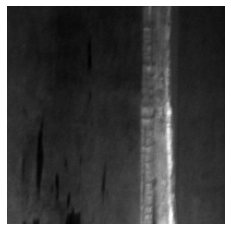

Actuall Image:  ['Sc_109.bmp']


In [72]:
predict_img = 71
print('Prediction is: ', Categories[prediction[predict_img]])
Defect = features_test[predict_img].reshape(200,200)
plt.imshow(Defect,cmap='gray')
plt.axis("off")
plt.show()

print('Actuall Image: ', actual_image[predict_img])